In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [2]:
# Load the data from the csv file   
df = pd.read_csv('data/cleaned/cleaned_motor_vehicle_insurance_data.csv')

# Drop the 'ID' column
df.drop('ID', axis=1, inplace=True)

# Display the first 5 rows of the dataframe
df.head()

,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1975-03-18,1995-07-10,380.20,85,1229,16030.0,5,P,3.999,1105
1,1966-10-21,1990-09-10,250.52,87,1598,9927.0,4,P,4.250,1055
2,1946-05-14,2000-03-24,340.43,109,1396,16550.0,5,P,4.245,1168
3,1941-05-11,1962-08-01,335.82,130,1984,27330.0,4,P,4.547,1310
4,1951-02-16,1976-10-16,248.68,75,1390,8548.0,4,P,4.250,1050


# Data Analysis

In [3]:
print(f"Number of rows: {df.shape[0]}")
print("-"*100)
print(f"Number of columns: {df.shape[1]}")
print("-"*100)
print(f"Columns: {df.columns}")
print("-"*100)
print(f"Data types: \n{df.dtypes}")
print("-"*100)
print(f"Missing values: \n{df.isnull().sum()}")
print("-"*100)
print(f"Number of unique values: \n{df.nunique()}")
print("-"*100)
df.describe()



Number of rows: 37810
----------------------------------------------------------------------------------------------------
Number of columns: 10
----------------------------------------------------------------------------------------------------
Columns: Index(['Date_birth', 'Date_driving_licence', 'Premium', 'Power',
       'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Type_fuel', 'Length',
       'Weight'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Data types: 
Date_birth               object
Date_driving_licence     object
Premium                 float64
Power                     int64
Cylinder_capacity         int64
Value_vehicle           float64
N_doors                   int64
Type_fuel                object
Length                  float64
Weight                    int64
dtype: object
----------------------------------------------------------------------------------------------------
Missing valu

,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Length,Weight
count,37810.000000,37810.000000,37810.000000,37810.000000,37810.000000,37810.000000,37810.000000
mean,341.569554,108.354747,1808.745649,21652.681057,4.485956,4.359065,1341.293705
std,138.301980,28.102287,391.791290,8169.918465,0.855429,0.355256,236.305963
min,81.650000,71.000000,973.000000,7662.900000,2.000000,3.551000,1003.000000
25%,259.735000,90.000000,1560.000000,16600.000000,4.000000,4.157000,1180.000000
50%,309.010000,105.000000,1868.000000,20224.000000,5.000000,4.308000,1293.000000
75%,381.535000,120.000000,1995.000000,24535.000000,5.000000,4.503000,1430.000000
max,2797.510000,580.000000,6753.000000,220675.800000,6.000000,8.218000,4525.000000


### Correlation matrix

In [4]:
# Convert date data types to datetime
data = df.copy()

date_columns = ['Date_birth', 'Date_driving_licence']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], format='%Y-%m-%d')

data

,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1975-03-18,1995-07-10,380.20,85,1229,16030.00,5,P,3.999,1105
1,1966-10-21,1990-09-10,250.52,87,1598,9927.00,4,P,4.250,1055
2,1946-05-14,2000-03-24,340.43,109,1396,16550.00,5,P,4.245,1168
3,1941-05-11,1962-08-01,335.82,130,1984,27330.00,4,P,4.547,1310
4,1951-02-16,1976-10-16,248.68,75,1390,8548.00,4,P,4.250,1050
...,...,...,...,...,...,...,...,...,...,...
37805,1961-06-29,1990-12-28,233.22,75,1968,21761.85,5,D,4.408,1564
37806,1981-07-25,2007-02-14,263.79,110,1997,24320.00,5,D,4.740,1480
37807,1976-12-08,2017-11-29,418.97,129,1998,30861.97,5,P,4.650,1440
37808,1946-09-15,1982-02-02,339.66,90,1753,16610.00,5,D,4.555,1399


In [5]:
# Convert dates to age and driving experience in years
data['Age'] = ((pd.to_datetime('today') - data['Date_birth']).dt.days / 365.25).astype(int)
data['Driving_experience'] = ((pd.to_datetime('today') - data['Date_driving_licence']).dt.days / 365.25).astype(int)

# Drop the original date columns
data.drop(columns=['Date_birth', 'Date_driving_licence'], inplace=True)
data


,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Age,Driving_experience
0,380.20,85,1229,16030.00,5,P,3.999,1105,49,29
1,250.52,87,1598,9927.00,4,P,4.250,1055,57,33
2,340.43,109,1396,16550.00,5,P,4.245,1168,78,24
3,335.82,130,1984,27330.00,4,P,4.547,1310,83,61
4,248.68,75,1390,8548.00,4,P,4.250,1050,73,47
...,...,...,...,...,...,...,...,...,...,...
37805,233.22,75,1968,21761.85,5,D,4.408,1564,63,33
37806,263.79,110,1997,24320.00,5,D,4.740,1480,42,17
37807,418.97,129,1998,30861.97,5,P,4.650,1440,47,6
37808,339.66,90,1753,16610.00,5,D,4.555,1399,77,42


In [6]:
# Categorical encoding
# Perform one-hot encoding on 'Type_fuel' column
type_fuel_dummies = pd.get_dummies(data['Type_fuel'], prefix='FuelType')

# Drop the original 'Type_fuel' column from 'data'
data = data.drop('Type_fuel', axis=1)

# Join the dummy variables to the original DataFrame
data = pd.concat([data, type_fuel_dummies], axis=1)
data['FuelType_D'] = data['FuelType_D'].astype(int)
data['FuelType_P'] = data['FuelType_P'].astype(int)
data


,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Length,Weight,Age,Driving_experience,FuelType_D,FuelType_P
0,380.20,85,1229,16030.00,5,3.999,1105,49,29,0,1
1,250.52,87,1598,9927.00,4,4.250,1055,57,33,0,1
2,340.43,109,1396,16550.00,5,4.245,1168,78,24,0,1
3,335.82,130,1984,27330.00,4,4.547,1310,83,61,0,1
4,248.68,75,1390,8548.00,4,4.250,1050,73,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37805,233.22,75,1968,21761.85,5,4.408,1564,63,33,1,0
37806,263.79,110,1997,24320.00,5,4.740,1480,42,17,1,0
37807,418.97,129,1998,30861.97,5,4.650,1440,47,6,0,1
37808,339.66,90,1753,16610.00,5,4.555,1399,77,42,1,0


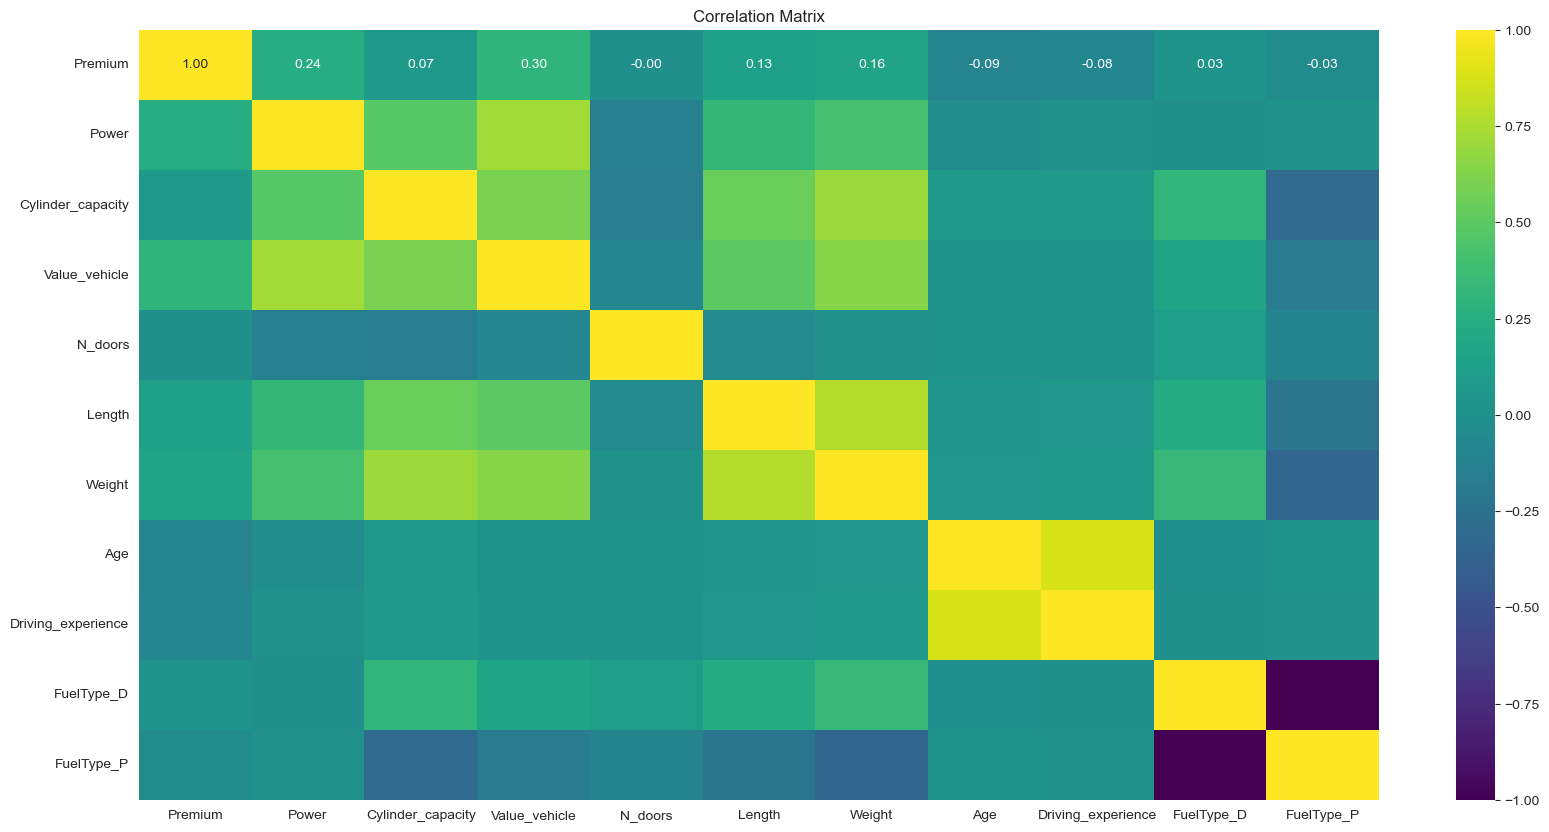

Premium               1.000000
Value_vehicle         0.302778
Power                 0.238944
Weight                0.156271
Length                0.131740
Cylinder_capacity     0.073863
FuelType_D            0.032713
N_doors              -0.004310
FuelType_P           -0.032713
Driving_experience   -0.084236
Age                  -0.094233
Name: Premium, dtype: float64


In [7]:
correlation_matrix = data.corr()


# Plot the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


print(correlation_matrix['Premium'].sort_values(ascending=False))


Plot the premium relationship with the other columns in the dataset

In [8]:
# Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

X = data.drop('Premium', axis=1)
y = data['Premium']

# Create the RFE model and select 5 attributes
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False False  True False  True  True  True  True False False]
Feature Ranking: [2 3 1 4 1 1 1 1 6 5]


Feature: Power, Score: 0.08687
Feature: Cylinder_capacity, Score: 0.08940
Feature: Value_vehicle, Score: 0.24126
Feature: N_doors, Score: 0.02474
Feature: Length, Score: 0.11294
Feature: Weight, Score: 0.10641
Feature: Age, Score: 0.17890
Feature: Driving_experience, Score: 0.14669
Feature: FuelType_D, Score: 0.00628
Feature: FuelType_P, Score: 0.00651


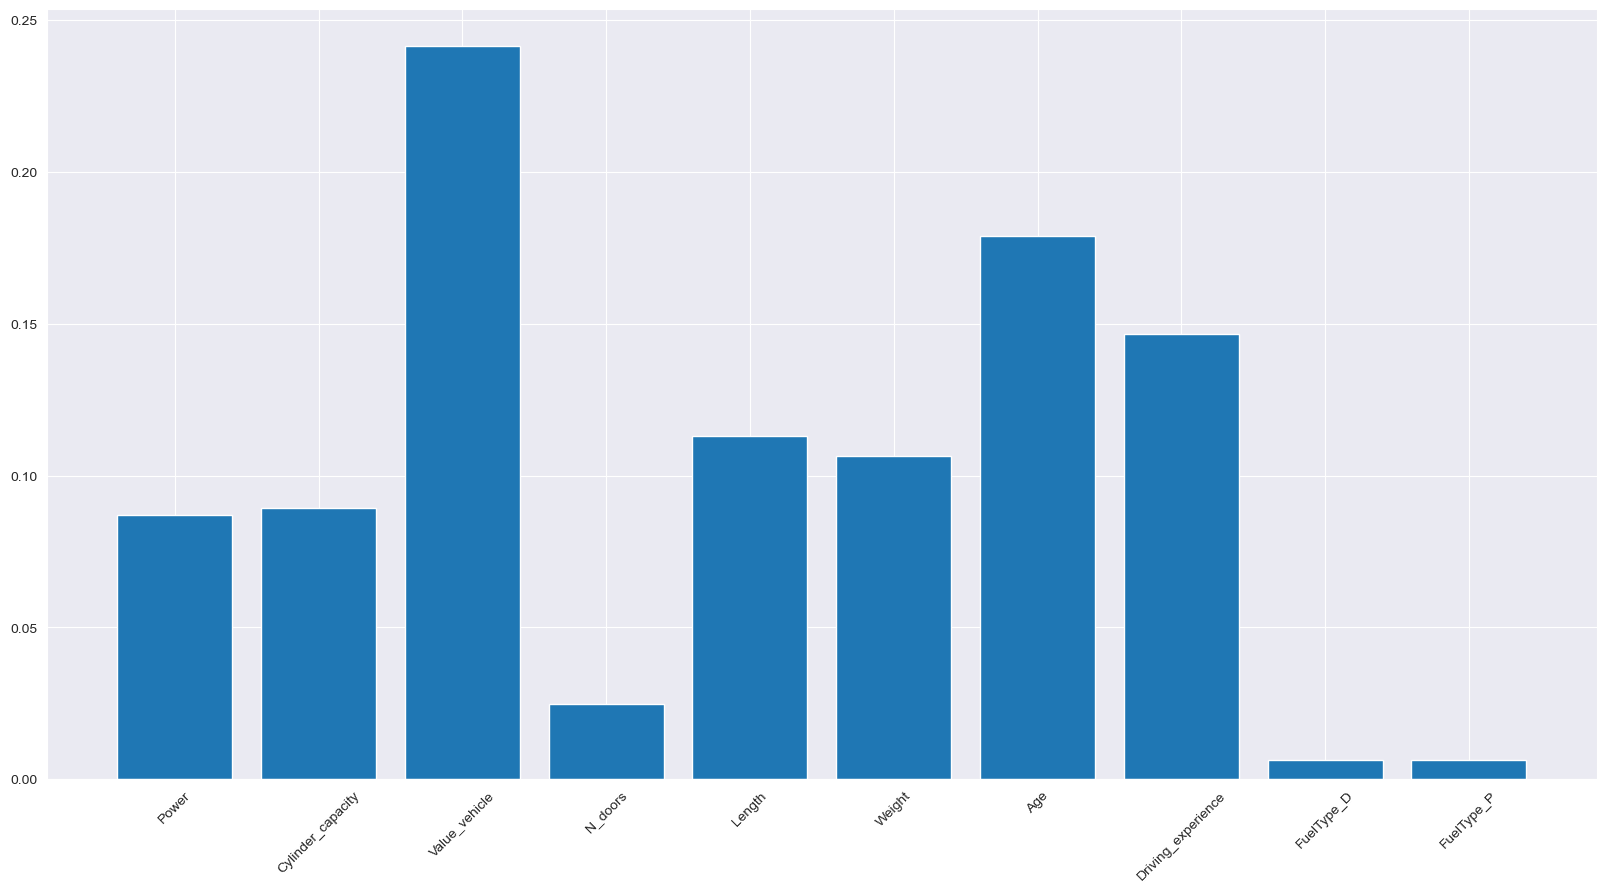

In [9]:
#Model-based feature importance
model.fit(X, y)

# Get the feature importance
importance = model.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i], v))

# Plot feature importance with feature names
plt.figure(figsize=(20, 10))
plt.bar(X.columns, importance)
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()

In [10]:
# Remove the least important features
feature_selected_data = data.drop(['Power','Cylinder_capacity','N_doors','FuelType_D', 'FuelType_P'], axis=1)
feature_selected_data

,Premium,Value_vehicle,Length,Weight,Age,Driving_experience
0,380.20,16030.00,3.999,1105,49,29
1,250.52,9927.00,4.250,1055,57,33
2,340.43,16550.00,4.245,1168,78,24
3,335.82,27330.00,4.547,1310,83,61
4,248.68,8548.00,4.250,1050,73,47
...,...,...,...,...,...,...
37805,233.22,21761.85,4.408,1564,63,33
37806,263.79,24320.00,4.740,1480,42,17
37807,418.97,30861.97,4.650,1440,47,6
37808,339.66,16610.00,4.555,1399,77,42


In [12]:
# Save the cleaned data to a new csv file

path = os.getcwd()

if not os.path.exists('data/cleaned'):
    print('Creating a new directory to store the cleaned data')
    os.makedirs('data/cleaned')

file_path = os.path.join(path, 'data/cleaned/motor_vehicle_insurance_data_feature_selected.csv')

try:
    feature_selected_data.to_csv(file_path, index=False)
    print('Data saved successfully')
except Exception as e:
    print('An error occurred while saving the data')
    print(e)
# data.to_csv('data/cleaned/cleaned_motor_vehicle_insurance_data.csv', index=False)

Data saved successfully
